In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt

In [161]:
df_Prod_Freq=pd.read_csv("Produtos_Frequencia.csv")
df_Prod_Freq.head()

,Productos,Quantidade
0,Produto_1,600
1,Produto_2,320
2,Produto_3,220
3,Produto_4,110
4,Produto_5,90


In [162]:
df_Prod_Freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
Productos     20 non-null object
Quantidade    20 non-null int64
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


In [163]:
# Calcular o Porcentagem
Qtd_Total_Produtos=1.0*sum(df_Prod_Freq.Quantidade)
df_Prod_Freq["Porcentagem_Prod"]=np.round(100*df_Prod_Freq.Quantidade/Qtd_Total_Produtos,decimals=2)
#Porcentagem_Acumulada
Primeiro_Valor=df_Prod_Freq.Porcentagem_Prod[0]
df_Prod_Freq.set_value(0,"Porcentagem_Prod_Acumulada",Primeiro_Valor)
cont=0
for valor in  df_Prod_Freq.Porcentagem_Prod[1:]:
    Valor_Anterior=df_Prod_Freq.Porcentagem_Prod_Acumulada[cont]
#     print (Valor_Anterior)
    df_Prod_Freq.set_value(cont+1,"Porcentagem_Prod_Acumulada",valor+Valor_Anterior)
    
    cont +=1
print (df_Prod_Freq)


     Productos  Quantidade  Porcentagem_Prod  Porcentagem_Prod_Acumulada
0    Produto_1         600             25.81                       25.81
1    Produto_2         320             13.76                       39.57
2    Produto_3         220              9.46                       49.03
3    Produto_4         110              4.73                       53.76
4    Produto_5          90              3.87                       57.63
5    Produto_6          85              3.66                       61.29
6    Produto_7          80              3.44                       64.73
7    Produto_8          78              3.35                       68.08
8    Produto_9          75              3.23                       71.31
9   Produto_10          72              3.10                       74.41
10  Produto_11          70              3.01                       77.42
11  Produto_12          65              2.80                       80.22
12  Produto_13          60              2.58       

C:\Users\emily\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\emily\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [164]:
df_Prod_Freq=df_Prod_Freq.iloc[:-1]
df_Prod_Freq

,Productos,Quantidade,Porcentagem_Prod,Porcentagem_Prod_Acumulada
0,Produto_1,600,25.81,25.81
1,Produto_2,320,13.76,39.57
2,Produto_3,220,9.46,49.03
3,Produto_4,110,4.73,53.76
4,Produto_5,90,3.87,57.63
5,Produto_6,85,3.66,61.29
6,Produto_7,80,3.44,64.73
7,Produto_8,78,3.35,68.08
8,Produto_9,75,3.23,71.31
9,Produto_10,72,3.10,74.41


In [165]:
def Formatar_Barra(ax_1,Coluna,Largura_Barra):
    '''
    ax_1: Grafica de Barras para Alterara
    df: Columna do eixo_X do Dataframe do Grafico
    Largura_Barra: Porcentagem da largura das Barras 
    '''
    columncounts=[]
    for Num_Bar in range(len(Coluna)): 
        columncounts.insert(Num_Bar,Largura_Bar)
    # Maximum bar width is 1. Normalise counts to be in the interval 0-1. Need to supply a maximum possible count here as maxwidth
    def normaliseCounts(widths,maxwidth):
        widths = np.array(widths)/float(maxwidth)
        return widths

    widthbars = normaliseCounts(columncounts,100)

    # Loop over the bars, and adjust the width (and position, to keep the bar centred)
    for bar,newwidth in zip(ax_1.patches,widthbars):
        x = bar.get_x()
        width = bar.get_width()
        centre = x+width/2.
        bar.set_x(centre-newwidth/2.)
        bar.set_width(newwidth)
#

In [223]:
def Graf_Barras_Line_Acum(df,Nome_Column_Exo_X,Nome_Column_Exo_Y,Nome_Column_Exo_Y_Acum,Largura_Bar):
    '''
    df: Dataframe para Graficar as Barras
    Nome_Column_Exo_X: Nome da Coluna do Eixo X para ajustar
    Nome_Column_Exo_Y: Nome da Coluna do Eixo Y para ajustar
    Nome_Column_Exo_Y_Acum: Nome da Coluna do Eixo Y para a metrica da linha da frecuencia acumulada
    Largura_Bar:tamanho da Largura de cada Barra
    '''
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(21, 12))
    ax1 = fig.add_subplot(111)
    font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'rotation':90,
            'size': 16,
            }
    ax1 = sns.barplot(x=Nome_Column_Exo_X, y=Nome_Column_Exo_Y, data=df, color=(0.6, 0.1, 0.55, 0.02))
    ax1.set_xticklabels(labels=df[Nome_Column_Exo_X], fontdict=font)
    # ax1.set_yticklabels(labels=df_Prod_Freq.Quantidade, fontdict=font)
    ax1.tick_params(axis='y', labelsize=18)
    ax1.set_xlabel("",weight = 'bold')
    ax1.set_ylabel("",weight = 'bold')
    ax.set_xticklabels(labels=[], fontdict=font)
    ax.set_yticklabels(labels=[], fontdict=font)
    ax.axes.set_title("Districuicao dos Produtos",fontsize=50)
    ax1.set_xlabel(Nome_Column_Exo_X,fontsize=20,weight = 'bold')
    ax1.set_ylabel(Nome_Column_Exo_Y,fontsize=20,weight = 'bold')
    ax.tick_params(labelsize=16)

    #Graficando a Linea de Frequancia Acumulada

    ax2 = ax.twinx()
    ax2=sns.set_context(rc={"lines.linewidth": 4})

    ax2=sns.lineplot(x=df.rename_axis('Ind_X').reset_index()["Ind_X"] , y=Nome_Column_Exo_Y_Acum, data=df, color='blue')
    [ax2.text(p[0], p[1]-3, p[1], color='black',weight = 'bold',fontsize=16) for p in zip(ax1.get_xticks(), np.round(df[Nome_Column_Exo_Y_Acum].values,decimals=0))]
    ax2.tick_params(axis='y',labelsize=18)
    ax2.set_ylabel("Porcentagem Acumulada",fontsize=20,weight = 'bold')
    #
    #Formatando as barras para cada um
    Formatar_Barra(ax2,df[Nome_Column_Exo_X],Largura_Bar)


<Figure size 432x288 with 0 Axes>

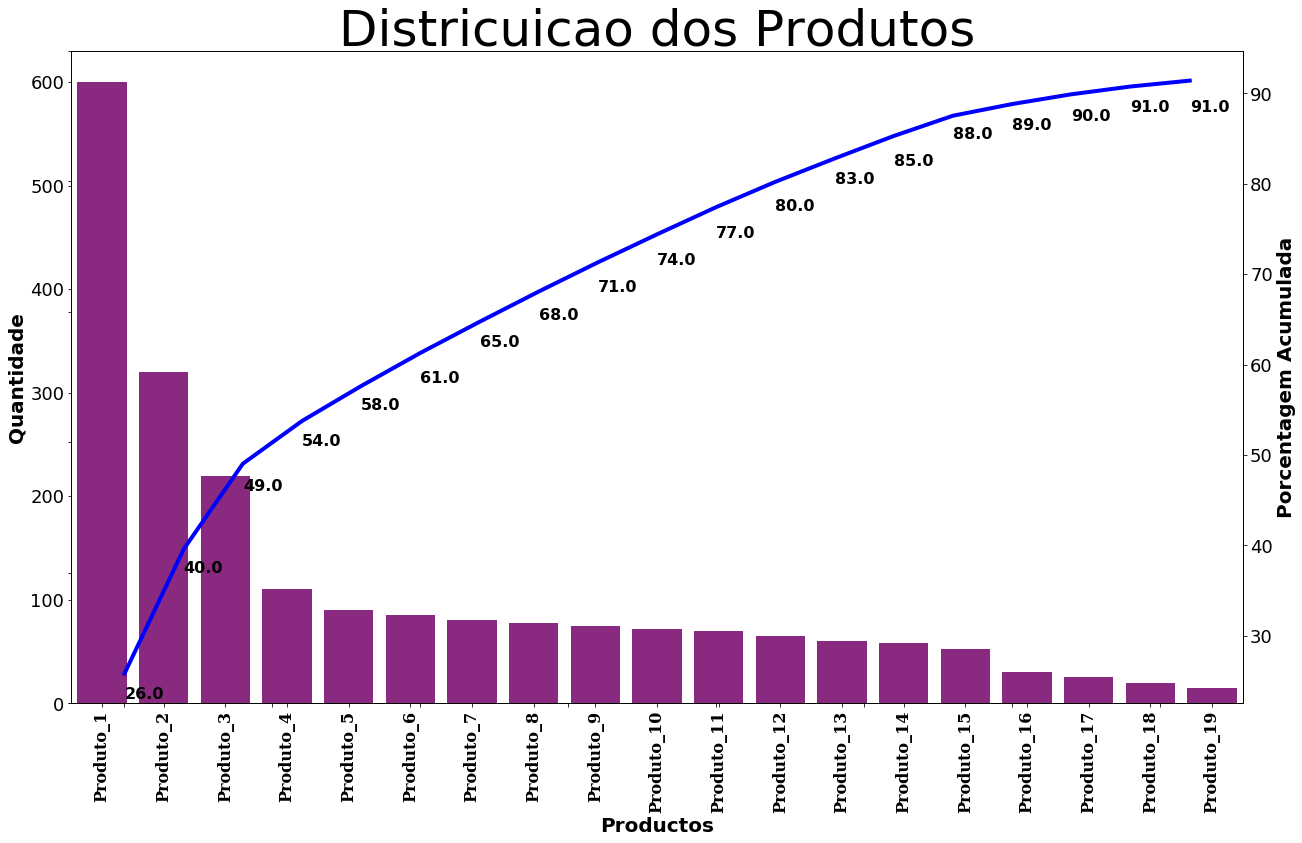

In [224]:
Largura_Bar=70
Nom_Colum_Eixo_X="Productos"
Nom_Colum_Eixo_Y="Quantidade"
Nom_Colum_Eixo_Y_Acum="Porcentagem_Prod_Acumulada"
Graf_Barras_Line_Acum(df_Prod_Freq,Nom_Colum_Eixo_X,Nom_Colum_Eixo_Y,Nom_Colum_Eixo_Y_Acum,Largura_Bar)

In [225]:
import ipywidgets as widgets

In [227]:
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [231]:
widgets.FloatSlider(
    value=0.00,
    min=-10.0,
    max=10.0,
    step=0.01,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

FloatSlider(value=0.0, continuous_update=False, description='Test:', max=10.0, min=-10.0, step=0.01)

In [232]:
widgets.FloatProgress(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Loading:',
    bar_style='info',
    orientation='horizontal'
)

FloatProgress(value=7.5, bar_style='info', description='Loading:', max=10.0)

In [233]:

widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)

ToggleButtons(description='Speed:', options=('Slow', 'Regular', 'Fast'), tooltips=('Description of slow', 'Des…

In [263]:
Red = widgets.IntSlider(description='Red')
Green = widgets.IntSlider(description='Green')
Blue = widgets.IntSlider(description='Blue')
A = widgets.IntSlider(description='A')
def f(Red, Green, Blue):
    Resultado=('{}*{}*{}={}'.format(Red, Green, Blue, Red*Green*Blue))
    return (Resultado)
# Valor=f(Red, Green, Blue)
# print (Valor)
out = widgets.interactive_output(f, {'Red': Red, 'Green': Green, 'Blue': Blue})

widgets.HBox([widgets.VBox([Red, Green, Blue]), out])

In [236]:
a = widgets.IntSlider(description="Delayed", continuous_update=False)
b = widgets.IntText(description="Delayed", continuous_update=False)
c = widgets.IntSlider(description="Continuous", continuous_update=True)
d = widgets.IntText(description="Continuous", continuous_update=True)

widgets.link((a, 'value'), (b, 'value'))
widgets.link((a, 'value'), (c, 'value'))
widgets.link((a, 'value'), (d, 'value'))
widgets.VBox([a,b,c,d])

In [243]:
from ipywidgets import Layout, Button, Box

items_layout = Layout( width='auto')     # override the default width of the button to 'auto' to let the button grow

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='stretch',
                    border='solid',
                    width='50%')

words = ['correct', 'horse', 'battery', 'staple']
items = [Button(description=word, layout=items_layout, button_style='danger') for word in words]
box = Box(children=items, layout=box_layout)
box

Box(children=(Button(button_style='danger', description='correct', layout=Layout(width='auto'), style=ButtonSt…

In [244]:
from ipywidgets import Layout, Button, Box, VBox

# Items flex proportionally to the weight and the left over space around the text
items_auto = [
    Button(description='weight=1; auto', layout=Layout(flex='1 1 auto', width='auto'), button_style='danger'),
    Button(description='weight=3; auto', layout=Layout(flex='3 1 auto', width='auto'), button_style='danger'),
    Button(description='weight=1; auto', layout=Layout(flex='1 1 auto', width='auto'), button_style='danger'),
 ]

# Items flex proportionally to the weight
items_0 = [
    Button(description='weight=1; 0%', layout=Layout(flex='1 1 0%', width='auto'), button_style='danger'),
    Button(description='weight=3; 0%', layout=Layout(flex='3 1 0%', width='auto'), button_style='danger'),
    Button(description='weight=1; 0%', layout=Layout(flex='1 1 0%', width='auto'), button_style='danger'),
 ]
box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='70%')
box_auto = Box(children=items_auto, layout=box_layout)
box_0 = Box(children=items_0, layout=box_layout)
VBox([box_auto, box_0])

In [246]:

from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Age of the captain'), IntSlider(min=40, max=60)], layout=form_item_layout),
    Box([Label(value='Egg style'),
         Dropdown(options=['Scrambled', 'Sunny side up', 'Over easy'])], layout=form_item_layout),
    Box([Label(value='Ship size'),
         FloatText()], layout=form_item_layout),
    Box([Label(value='Information'),
         Textarea()], layout=form_item_layout)
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

Box(children=(Box(children=(Label(value='Age of the captain'), IntSlider(value=40, max=60, min=40)), layout=La…

In [247]:
from ipywidgets import Layout, Button, Box

item_layout = Layout(height='100px', min_width='40px')
items = [Button(layout=item_layout, description=str(i), button_style='warning') for i in range(40)]
box_layout = Layout(overflow_x='scroll',
                    border='3px solid black',
                    width='500px',
                    height='',
                    flex_flow='row',
                    display='flex')
carousel = Box(children=items, layout=box_layout)
VBox([Label('Scroll horizontally:'), carousel])